<a href="https://colab.research.google.com/github/aswinashokkumar/my-first-blog/blob/master/Topic_Modeling_using_LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install nltk

In [1]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
documents = newsgroups.data


In [12]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt') # Download the Punkt sentence tokenizer

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # Tokenization
    tokens = nltk.word_tokenize(text.lower())
    # Lemmatization and stop words removal
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [13]:
from gensim import corpora, models

# Preprocess the documents using the function you defined earlier
processed_docs = [preprocess(doc) for doc in documents]

# Tokenize the preprocessed documents
tokenized_docs = [doc.split() for doc in processed_docs]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Apply LDA
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Display topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"one" + 0.009*"would" + 0.007*"drive" + 0.007*"like" + 0.007*"get" + 0.005*"car" + 0.005*"problem" + 0.005*"know" + 0.005*"card" + 0.005*"also"
Topic: 1 
Words: 0.046*"max" + 0.044*"p" + 0.042*"r" + 0.039*"g" + 0.038*"q" + 0.034*"n" + 0.029*"c" + 0.028*"b" + 0.028*"w" + 0.025*"e"
Topic: 2 
Words: 0.138*"x" + 0.011*"entry" + 0.007*"echo" + 0.006*"file" + 0.006*"int" + 0.006*"output" + 0.006*"copy" + 0.006*"comic" + 0.005*"appears" + 0.005*"char"
Topic: 3 
Words: 0.011*"game" + 0.010*"year" + 0.009*"would" + 0.008*"get" + 0.008*"think" + 0.007*"one" + 0.007*"team" + 0.006*"time" + 0.006*"go" + 0.006*"like"
Topic: 4 
Words: 0.017*"key" + 0.014*"government" + 0.011*"gun" + 0.010*"law" + 0.007*"state" + 0.007*"public" + 0.007*"weapon" + 0.007*"would" + 0.006*"use" + 0.006*"encryption"
Topic: 5 
Words: 0.008*"space" + 0.007*"research" + 0.006*"university" + 0.006*"information" + 0.006*"study" + 0.006*"program" + 0.005*"may" + 0.005*"drug" + 0.005*"science" + 0.005*"hea

In [14]:
pip install pyLDAvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.0 MB/s eta 0:00:00


In [15]:
import pyLDAvis.gensim

# Prepare visualization data
lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


In [16]:
pip install gensim


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2024-08-25 14:19:34--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 3.5.3.244, 52.217.228.144, 52.216.86.141, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|3.5.3.244|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-08-25 14:19:34 ERROR 404: Not Found.



In [34]:
!pip install gensim

import gensim.downloader as api

# Load pre-trained GloVe model (e.g., 100-dimensional vectors)
glove_model = api.load('glove-wiki-gigaword-100')

def get_document_embedding_glove(doc, model):
    """Generate a document embedding by averaging word embeddings using GloVe."""
    words = doc.split()
    valid_words = [word for word in words if word in model]  # Filter words present in the model
    if valid_words:
        return np.mean([model[word] for word in valid_words], axis=0)  # Average embeddings of valid words
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid words

# Example usage:
document_embedding = get_document_embedding_glove(processed_docs[0], glove_model)
print(document_embedding)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[==================================================] 100.0% 128.1/128.1MB downloaded
[-5.83005510e-02  1.92487851e-01  3.75593990e-01 -4.18531507e-01
 -2.53381819e-01  2.11109489e-01  5.82107529e-02  9.33241565e-03
 -1.57598421e-01 -2.25056693e-01 -4.42447178e-02 -9.51524358e-03
  5.17008565e-02 -1.78459838e-01  8.70707110e-02 -1.29473172e-02
 -1.12643152e-01  1.49924755e-01 -1.17882937e-01  2.89395988e-01
  2.90943027e-01  2.30136961e-01 -1.52796552e-01 -1.89145748e-03
  3.12691689e-01 -5.42850196e-02 -1.80825323e-01 -3.36270303e-01
  1.88557327e-01 -1.83792114e-01 -1.75746307e-01  3.98530781e-01
  3.23409811e-02 -9.77592263e-03  7.68018067e-02  6.89206347e-02
 -2.59315699e-01  2.16774911e-01 -5.54757528e-02 -1.87948734e-01
 -1.31274104e-01 -2.24337623e-01  1.23906493e-01 -3.35597217e-01
 -1.65453941e-01 -9.74458680e-02  1.76843777e-01 -2.38579795e-01
  1.11415319e-01 -6.80487037e-01  3.56149748e-02 -1.73061311e-01
  1.67783145e-02  7.36436963e-01 -1.05549000e-01 -1.79178023e+00
  8.2

In [35]:
!pip install gensim

import gensim.downloader as api

# Load pre-trained FastText model
fasttext_model = api.load('fasttext-wiki-news-subwords-300')

def get_document_embedding_fasttext(doc, model):
    """Generate a document embedding by averaging word embeddings using FastText."""
    words = doc.split()
    valid_words = [word for word in words if word in model]  # Filter words present in the model
    if valid_words:
        return np.mean([model[word] for word in valid_words], axis=0)  # Average embeddings of valid words
    else:
        return np.zeros(model.vector_size)  # Return a zero vector if no valid words

# Example usage:
document_embedding = get_document_embedding_fasttext(processed_docs[0], fasttext_model)
print(document_embedding)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[==================================================] 100.0% 958.5/958.4MB downloaded
[ 2.33340543e-03 -1.10912258e-02  9.99107212e-03  8.15792195e-03
 -2.99159065e-02 -1.83943789e-02 -1.22498730e-02 -1.17304876e-01
  6.64918730e-03  7.00661354e-03 -2.85404921e-02 -3.10876872e-02
  3.68654281e-02  1.03171384e-02  2.47769104e-03  9.65166092e-03
  9.87024680e-02  9.58367251e-03  7.22078606e-02 -1.67478644e-03
  1.26349842e-02 -4.59002564e-03 -2.80486830e-02  7.38217533e-02
  8.07095598e-03 -1.94614306e-02  3.47973704e-02 -8.86378810e-03
  1.95711572e-02  2.58700573e-03 -1.57239996e-02 -1.71126574e-02
 -7.39551091e-04 -5.58696352e-02  4.12258413e-03 -3.23057882e-02
  2.88607441e-02  7.67364446e-03 -1.07278954e-03 -1.29103102e-02
  3.02688754e-03 -8.53149220e-02 -2.42447499e-02  4.58388851e-04
 -6.70270715e-03  1.62796825e-02  1.62251722e-02 -5.34621952e-03
  1.74960252e-02  1.69438105e-02  6.28162501e-03  1.27039310e-02
  1.89328790e-02 -2.39523463e-02 -7.85530284e-02  1.94956094e-03
  3.4

In [37]:
def get_lda_topic_distribution(doc, lda_model, dictionary, num_topics):
    bow_vector = dictionary.doc2bow(doc.split())
    lda_vector = lda_model[bow_vector]
    # Initialize a vector of zeros for the full topic space
    topic_distribution = np.zeros(num_topics)
    # Populate the vector with topic probabilities
    for topic_id, prob in lda_vector:
        topic_distribution[topic_id] = prob
    return topic_distribution

# Get the number of topics from the LDA model
num_topics = lda_model.num_topics

# Convert documents to LDA topic vectors
lda_topic_vectors = np.array([get_lda_topic_distribution(doc, lda_model, dictionary, num_topics) for doc in processed_docs])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
from gensim import corpora, models
import numpy as np

# Assuming you have preprocessed documents and created the corpus and dictionary
# Example: processed_docs = [...]
# Example: dictionary = corpora.Dictionary(tokenized_docs)
# Example: corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Get topic distributions for each document
lda_topic_distributions = np.array([lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus])

# Convert the topic distributions to a dense matrix (if needed)
lda_topic_vectors = np.array([[topic_prob for _, topic_prob in doc] for doc in lda_topic_distributions])

print("LDA Topic Vectors:\n", lda_topic_vectors)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LDA Topic Vectors:
 [[1.43359660e-03 1.43377774e-03 4.06919986e-01 ... 1.43377692e-03
  1.43357122e-03 8.89157578e-02]
 [3.57298739e-03 9.09379244e-01 3.57296248e-03 ... 3.57272616e-03
  3.57283745e-03 3.57311196e-03]
 [1.42822027e-01 8.95233243e-04 4.05431807e-01 ... 9.23075434e-03
  8.95246456e-04 8.95347213e-04]
 ...
 [2.04488286e-03 4.50498521e-01 2.04481347e-03 ... 2.04456830e-03
  2.04460905e-03 5.09057045e-01]
 [4.76704538e-03 7.79691860e-02 8.12088609e-01 ... 4.76683117e-03
  4.76695877e-03 7.65730590e-02]
 [2.12337337e-02 9.19135346e-04 3.65719646e-01 ... 9.18878708e-04
  9.14158076e-02 4.45612997e-01]]


In [49]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assume lda_topic_vectors is a NumPy array where each row represents a document vector
# Example: lda_topic_vectors = np.array([...])

# Calculate cosine similarity between document vectors
lda_similarity_matrix = cosine_similarity(lda_topic_vectors)

# Display the similarity matrix
print("Cosine Similarity Matrix:\n", lda_similarity_matrix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cosine Similarity Matrix:
 [[1.         0.06236924 0.54571176 ... 0.         0.76544324 0.52709318]
 [0.06236924 1.         0.04665485 ... 0.80837758 0.07510025 0.05171491]
 [0.54571176 0.04665485 1.         ... 0.         0.57258413 0.39428815]
 ...
 [0.         0.80837758 0.         ... 1.         0.01707766 0.40776343]
 [0.76544324 0.07510025 0.57258413 ... 0.01707766 1.         0.72982144]
 [0.52709318 0.05171491 0.39428815 ... 0.40776343 0.72982144 1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


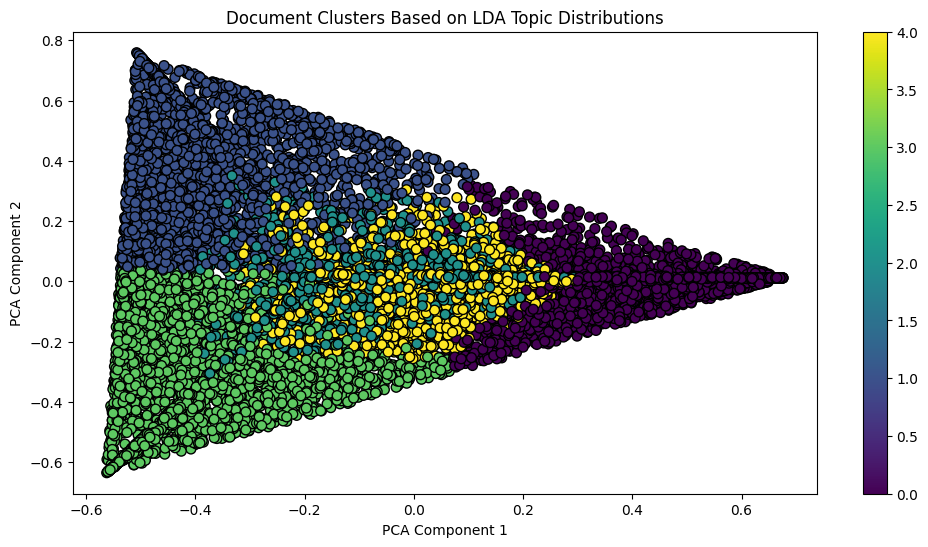

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Calculate cosine similarity between LDA topic vectors
lda_similarity_matrix = cosine_similarity(lda_topic_vectors)

# Perform K-Means clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
lda_labels = kmeans.fit_predict(lda_topic_vectors)

# Visualize clusters using PCA
pca = PCA(n_components=2)
lda_reduced = pca.fit_transform(lda_topic_vectors)

# Adjust the figure size (change the width and height as needed)
plt.figure(figsize=(12, 6))  # Change this to your desired size
plt.scatter(lda_reduced[:, 0], lda_reduced[:, 1], c=lda_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Document Clusters Based on LDA Topic Distributions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
